In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import rescomp

# new imports:
from rescomp.alternative_tests import simulation_tests as simt

# Conduct experiment:
compare trajectory divergence for:
- Lorenz
- Logistic
- Holmes cubic
- 4D Hyperchaotic Lorenz
- Lorenz96
- Kuramoto Sivachinsky

### Define path here:

In [3]:
prepath = "C:/Users\Dennis\Documents\FILES&INFO\WISSEN\STUDIUM\Master LMU\Masterthesis\LyapunovExponentsSimulations"
exp_name_both = "all_sims_0602"

## Lorenz:

In [39]:
# create the "create_sim_func" func:
def create_sim_func(parameters):
    sys_flag = "lorenz"
    def data_creation_function(time_steps, dt, starting_point):
        return rescomp.simulations.simulate_trajectory(sys_flag, dt, time_steps, starting_point)

    return data_creation_function

# create the "create_sp_func" starting point func:
def create_sp_func(parameters, Nens):
    seed = parameters["seed"]
    scale = parameters["scale"]
    randmode = parameters["randmode"]
    np.random.seed(seed)
    if randmode == "normal":
        starting_points = np.random.randn(Nens, 3)
    elif randmode == "uniform":
        starting_points = np.random.uniform(size=(Nens, 3)) - 0.5
    return starting_points*scale

create_sim_func_keys = []
create_sp_func_keys = ["seed", "scale", "randmode"]

In [41]:
# create the parameter dict to define the experiment:
parameter_dict = {
    "sim": ["lorenz"],
    "seed": 31,
    "scale": [1 ],
    "randmode": ["uniform"],

    "dt": [0.05],
    "tau": 500,
    "T": 20,

    "eps": [1e-6]
}

# define Ndims and Nens
Ndims = 5
Nens = 50

# define saving:
save = True

div_name = "_lorenz"
exp_name_div = exp_name_both + div_name

# other parameters:
get_info = True
random_directions = True

out_div = simt.compare_simulations_div(create_sim_func, create_sp_func, create_sim_func_keys, create_sp_func_keys,
                    parameter_dict, save=save, prepath=prepath, exp_name=exp_name_div, Nens=Nens, Ndims=Ndims
                         , get_info=get_info, random_directions=random_directions)

--------------------
create_sim_func_keys []
create_sp_func_keys ['seed', 'scale', 'randmode']
--------------------
--------------------
PARAMETERS: 
sim lorenz
seed 31
scale 1
randmode uniform
dt 0.05
tau 500
T 20
eps 1e-06
--------------------
STARTING CALCULATIONS (1): 
....
CALC: 1/1
{'seed': 31, 'scale': 1, 'randmode': 'uniform'}, dt: 0.05, tau: 500, T: 20, eps: 1e-06
N_ens: 1/50
timestep 400/400
N_ens: 2/50
timestep 400/400
N_ens: 3/50
timestep 400/400
N_ens: 4/50
timestep 400/400
N_ens: 5/50
timestep 400/400
N_ens: 6/50
timestep 400/400
N_ens: 7/50
timestep 400/400
N_ens: 8/50
timestep 400/400
N_ens: 9/50
timestep 400/400
N_ens: 10/50
timestep 400/400
N_ens: 11/50
timestep 400/400
N_ens: 12/50
timestep 400/400
N_ens: 13/50
timestep 400/400
N_ens: 14/50
timestep 400/400
N_ens: 15/50
timestep 400/400
N_ens: 16/50
timestep 400/400
N_ens: 17/50
timestep 400/400
N_ens: 18/50
timestep 400/400
N_ens: 19/50
timestep 400/400
N_ens: 20/50
timestep 400/400
N_ens: 21/50
timestep 400/400
N_e

lines: 1, cols: 1, rows: 1
x_steps:  401
T:  20


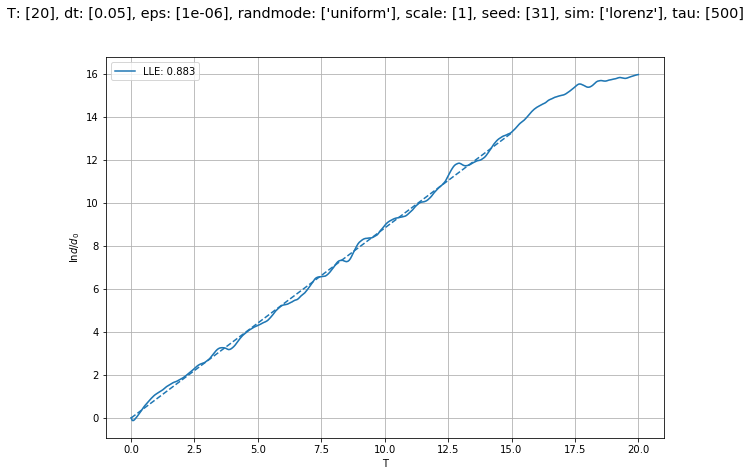

In [42]:
plot_func = simt.plot_div_file

zs = []
xs = []
ys = []

# simt.plot_div_file kwargs
mean_axs = "all"
show_error = 0
dim_index = None
ens_index = None

include_fit = 1
t_min = 0
t_max = 15

include_fit_qr = 0
t_min_qr = 0
t_max_qr = 7.5

subfigsize = (10, 7)
xlims = None #(0,10)
ylims = None # (-1, 10)

simt.plot_experiment(plot_func, prepath, exp_name_div, zs=zs, xs=xs, ys=ys, subfigsize=subfigsize, xlims=xlims,
                     ylims=ylims,
                     mean_axs=mean_axs, show_error=show_error,
                 rel_dist=True, include_fit=include_fit, dim_index=dim_index, ens_index=ens_index,
                t_min=t_min, t_max=t_max, include_fit_qr=include_fit_qr, t_min_qr=t_min_qr, t_max_qr=t_max_qr)

## Logistic Map:

In [43]:
# create the "create_sim_func" func:
def create_sim_func(parameters):
    r = parameters["r"]
    sys_flag = "logistic"
    def data_creation_function(time_steps, dt, starting_point):
        return rescomp.simulations.simulate_trajectory(sys_flag, dt, time_steps, starting_point, r=r)
    return data_creation_function

# create the "create_sp_func" starting point func:
def create_sp_func(parameters, Nens):
    seed = parameters["seed"]
    np.random.seed(seed)
    starting_points = np.random.uniform(size=(Nens, 1))*0.2
    return starting_points

create_sim_func_keys = ["r"]
create_sp_func_keys = ["seed", "scale", "randmode"]

In [44]:
# create the parameter dict to define the experiment:
parameter_dict = {
    "r": 4,
    "seed": 31,

    "dt": [1],
    "tau": 50,
    "T": 20,

    "eps": [1e-6]
}

# define Ndims and Nens
Ndims = 10
Nens = 30

# define saving:
save = True

div_name = "_logistic"
exp_name_div = exp_name_both + div_name

# other parameters:
get_info = True
random_directions = True

out_div = simt.compare_simulations_div(create_sim_func, create_sp_func, create_sim_func_keys, create_sp_func_keys,
                    parameter_dict, save=save, prepath=prepath, exp_name=exp_name_div, Nens=Nens, Ndims=Ndims
                         , get_info=get_info, random_directions=random_directions)

--------------------
create_sim_func_keys ['r']
create_sp_func_keys ['seed', 'scale', 'randmode']
--------------------
--------------------
PARAMETERS: 
r 4
seed 31
dt 1
tau 50
T 20
eps 1e-06
--------------------
STARTING CALCULATIONS (1): 
....
CALC: 1/1
{'r': 4, 'seed': 31}, dt: 1, tau: 50, T: 20, eps: 1e-06
N_ens: 1/30
timestep 20/20
N_ens: 2/30
timestep 20/20
N_ens: 3/30
timestep 20/20
N_ens: 4/30
timestep 20/20
N_ens: 5/30
timestep 20/20
N_ens: 6/30
timestep 20/20
N_ens: 7/30
timestep 20/20
N_ens: 8/30
timestep 20/20
N_ens: 9/30
timestep 20/20
N_ens: 10/30
timestep 20/20
N_ens: 11/30
timestep 20/20
N_ens: 12/30
timestep 20/20
N_ens: 13/30
timestep 20/20
N_ens: 14/30
timestep 20/20
N_ens: 15/30
timestep 20/20
N_ens: 16/30
timestep 20/20
N_ens: 17/30
timestep 20/20
N_ens: 18/30
timestep 20/20
N_ens: 19/30
timestep 20/20
N_ens: 20/30
timestep 20/20
N_ens: 21/30
timestep 20/20
N_ens: 22/30
timestep 20/20
N_ens: 23/30
timestep 20/20
N_ens: 24/30
timestep 20/20
N_ens: 25/30
timestep 20/

lines: 1, cols: 1, rows: 1
x_steps:  21
T:  20


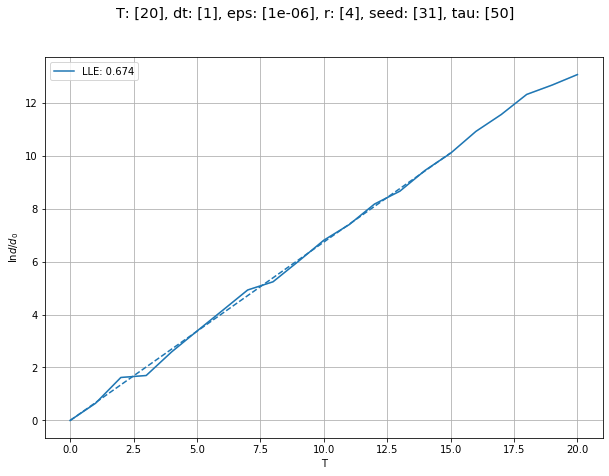

In [45]:
plot_func = simt.plot_div_file

zs = []
xs = []
ys = []

# simt.plot_div_file kwargs
mean_axs = "all"
show_error = 0
dim_index = None
ens_index = None

include_fit = 1
t_min = 0
t_max = 15

include_fit_qr = 0
t_min_qr = 0
t_max_qr = 7.5

subfigsize = (10, 7)
xlims = None #(0,10)
ylims = None # (-1, 10)

simt.plot_experiment(plot_func, prepath, exp_name_div, zs=zs, xs=xs, ys=ys, subfigsize=subfigsize, xlims=xlims,
                     ylims=ylims,
                     mean_axs=mean_axs, show_error=show_error,
                 rel_dist=True, include_fit=include_fit, dim_index=dim_index, ens_index=ens_index,
                t_min=t_min, t_max=t_max, include_fit_qr=include_fit_qr, t_min_qr=t_min_qr, t_max_qr=t_max_qr)

## Kuramoto Sivachinsky:


In [4]:
# define all the simulations we want to test:

def create_ks_sim_func(mode, dimensions, system_size, *args):
    if mode == "precision":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky_custom(dimensions, system_size, dt, time_steps,
                                                                    starting_point,
                                     precision=args[1], fft_type=args[0])
    elif mode == "Bhatt":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky_Bhatt(dimensions, system_size, dt, time_steps,
                                                                   starting_point)
    elif mode == "normal":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky(dimensions, system_size, dt, time_steps, starting_point)
    elif mode == "normal_M":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky(dimensions, system_size, dt, time_steps, starting_point,
                                                             M=args[0])
    elif mode == "Pathak":
        from rescomp.alternative_sims.pvlachas.Utils import KS
        def data_creation_function(time_steps, dt, starting_point=None):
            L = system_size / (2 * np.pi)
            dns = KS.KS(L=L, N=dimensions, dt=dt, nsteps=time_steps)
            dns.IC(u0=starting_point)
            # simulate initial transient
            dns.simulate()
            # convert to physical space
            dns.fou2real()
            return dns.return_sim_data()
    elif mode == "rkstiff":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky_rkstiff(dimensions, system_size, dt, time_steps,
                                                                   starting_point, IF_eps=args[0])
    return data_creation_function

# Create different KS Sim functions:
def create_ks_sim_dict(dimensions, system_size):
    ks_sim_dict = {
                   "scipy32": create_ks_sim_func("precision", dimensions, system_size, "scipy", 32),
                   "scipy64": create_ks_sim_func("precision", dimensions, system_size, "scipy", 64),
                   "scipy": create_ks_sim_func("precision", dimensions, system_size, "scipy", None),
                   "numpy32": create_ks_sim_func("precision", dimensions, system_size, "numpy", 32),
                   "numpy64": create_ks_sim_func("precision", dimensions, system_size, "numpy", 64),
                   "numpy": create_ks_sim_func("precision", dimensions, system_size, "numpy", None),
                   "Bhatt": create_ks_sim_func("Bhatt", dimensions, system_size),
                   "normal": create_ks_sim_func("normal", dimensions, system_size),
                   "normalM1": create_ks_sim_func("normal", dimensions, system_size, 16),
                   "normalM2": create_ks_sim_func("normal", dimensions, system_size, 200),
                   "Pathak": create_ks_sim_func("Pathak", dimensions, system_size),
                   "rkstiff": create_ks_sim_func("rkstiff", dimensions, system_size, 1e-4),
                   "rkstiffE1": create_ks_sim_func("rkstiff", dimensions, system_size, 1e-1),
                   "rkstiffE2": create_ks_sim_func("rkstiff", dimensions, system_size, 1e-2),
                   "rkstiffE3": create_ks_sim_func("rkstiff", dimensions, system_size, 1e-7),
    }
    return ks_sim_dict

In [7]:
# create the "create_sim_func" func:
def create_sim_func(parameters):
    dims = parameters["dims"]
    L = parameters["L"]
    sim = parameters["sim"]
    return create_ks_sim_dict(dimensions=dims, system_size=L)[sim]

# create the "create_sp_func" starting point func:
def create_sp_func(parameters, Nens):
    dims = parameters["dims"]
    seed = parameters["seed"]
    scale = parameters["scale"]
    np.random.seed(seed)
    starting_points = np.random.randn(Nens, dims)*scale
    return starting_points

# # create the "create_sp_func" starting point func:
# def create_sp_func(parameters, Nens):
#     dims = parameters["dims"]
#     L = parameters["L"]
#     x = L * np.transpose(np.conj(np.arange(1, dims + 1))) / dims
#     starting_points = np.cos(2 * np.pi * x / L) * (1 + np.sin(2 * np.pi * x / L))
#     return starting_points[np.newaxis, :]

create_sim_func_keys = ["dims", "L", "sim"]
create_sp_func_keys = ["dims", "seed", "scale"]
# create_sp_func_keys = ["dims", "L"]

In [ ]:
# create the parameter dict to define the experiment:
parameter_dict = {
    "L": 36,
    "dims": [ 54],
    "sim": ["scipy32", ], # , "Bhatt", "Pathak", "rkstiffE1", "numpy", "numpy32", "numpy64",
    "seed": 100,
    "scale": [2],

    "dt": [0.25],
    "tau": [50000],
    "T": 30,

    "eps":  [1e-6]
}
# define Ndims and Nens
Ndims = 10
Nens = 10

# define saving:
save = True

div_name = "_KS4"
exp_name_div = exp_name_both + div_name

# other parameters:
get_info = True
random_directions = True

out_div = simt.compare_simulations_div(create_sim_func, create_sp_func, create_sim_func_keys, create_sp_func_keys,
                    parameter_dict, save=save, prepath=prepath, exp_name=exp_name_div, Nens=Nens, Ndims=Ndims
                         , get_info=get_info, random_directions=random_directions)

--------------------
create_sim_func_keys ['dims', 'L', 'sim']
create_sp_func_keys ['dims', 'seed', 'scale']
--------------------
--------------------
PARAMETERS: 
L 36
dims 54
sim scipy32
seed 100
scale 2
dt 0.25
tau 50000
T 30
eps 1e-06
--------------------
STARTING CALCULATIONS (1): 


lines: 2, cols: 1, rows: 1


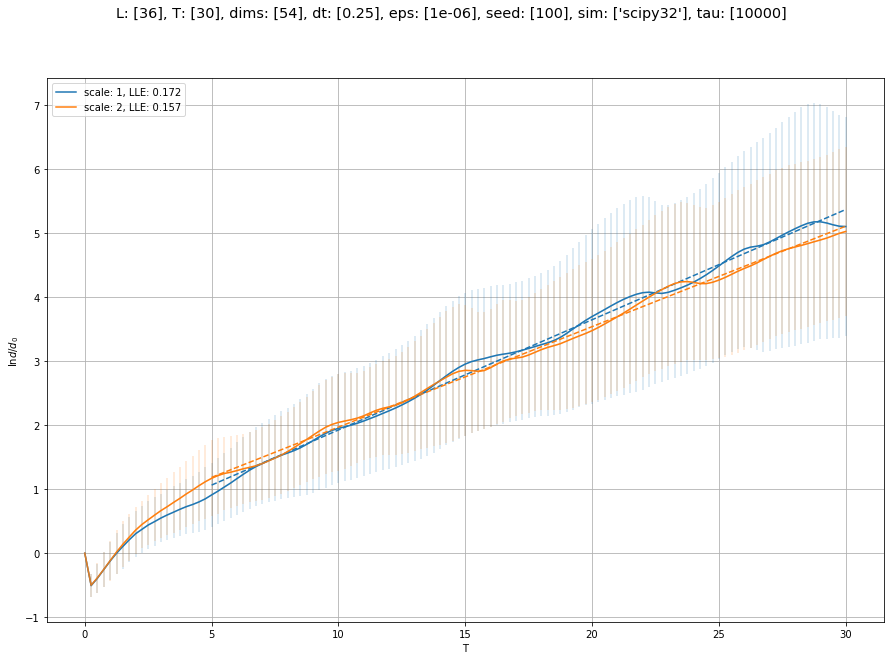

In [10]:
plot_func = simt.plot_div_file

zs = ["scale"]
xs = []
ys = []

# simt.plot_div_file kwargs
mean_axs = "all"
show_error = 1
dim_index = None
ens_index = None

include_fit = 1
t_min = 5
t_max = 30

include_fit_qr = 0
t_min_qr = 5
t_max_qr = 30

subfigsize = (15, 10)
xlims = None # (0,10)
ylims = None # (-1, 10)

simt.plot_experiment(plot_func, prepath, exp_name_div, zs=zs, xs=xs, ys=ys, subfigsize=subfigsize, xlims=xlims,
                     ylims=ylims,
                     mean_axs=mean_axs, show_error=show_error,
                 rel_dist=True, include_fit=include_fit, dim_index=dim_index, ens_index=ens_index,
            t_min=t_min, t_max=t_max, include_fit_qr=include_fit_qr, t_min_qr=t_min_qr, t_max_qr=t_max_qr)